In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2


def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=3, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))
    print("train_size:", train_sizes, "\n train_score:" , train_scores, "\ntest_scores:",test_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()
data = pd.read_csv('data2.csv')
data.head()
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

train_size: [ 6 21 36 51 66] 
 train_score: [[1.         1.         1.        ]
 [0.76190476 0.76190476 0.76190476]
 [0.63888889 0.72222222 0.69444444]
 [0.68627451 0.62745098 0.68627451]
 [0.74242424 0.63636364 0.60606061]] 
test_scores: [[0.61764706 0.57575758 0.51515152]
 [0.47058824 0.33333333 0.33333333]
 [0.29411765 0.39393939 0.42424242]
 [0.29411765 0.36363636 0.51515152]
 [0.35294118 0.36363636 0.42424242]]


/Users/tristan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


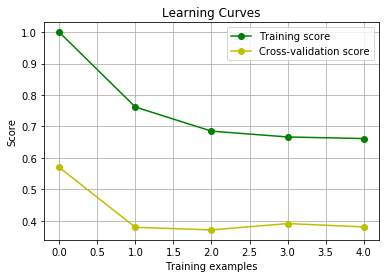

In [55]:
np.random.seed(55)
### Logistic Regression
estimator = LogisticRegression(solver="liblinear")
X2, y2 = randomize(X, y)
draw_learning_curves(X2, y2, estimator,5)
### Decision Tree
estimator2 = GradientBoostingClassifier()
### Logistic Regression
#draw_learning_curves(X2, y2, estimator2,10)
### Support Vector Machine

In [59]:


from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
scorer = make_scorer(f1_score)
clf = SVC()
#draw_learning_curves(X2, y2, estimator3,10)

from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]}
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
# Fit the data
grid_fit = grid_obj.fit(X, y)

/Users/tristan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/tristan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tristan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tristan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defaul

In [60]:
best_clf = grid_fit.best_estimator_

In [61]:
print(best_clf)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
